In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os


# create a new directory called 'kaggle_normalized', ignore if it already exists
os.makedirs('./kaggle_normalized', exist_ok=True)

labels = ['runFall', 'downSit', 'freeFall', 'runSit', 'walkFall', 'walkSit']
for l in labels:
    # read all csv files in the directory '/kaggle_data/' + l, delimit by ';'
    df = pd.concat([pd.read_csv(f, sep=';') for f in glob.glob('/home/c303784/RejectsVariabilityAnalysis(RVA)/code/hacathon/Fall_Data/' + l + '/*.csv')], ignore_index = True)
    # assign l to to df column 'Label'
    df['Label'] = l
    # save columns 'DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label' to csv
    df[['DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label']].to_csv('./kaggle_normalized/' + l + '.csv', index=False)

df = pd.concat([pd.read_csv(f) for f in glob.glob('./kaggle_normalized/*.csv')], ignore_index = True)
columns = ['DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label']


In [2]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('./kaggle_normalized/*.csv')], ignore_index = True)
columns = ['DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label']


# for each column in  'AccelerationX','AccelerationY', 'AccelerationZ', add a new column that is the
# fft of the original column. 
for c in ['AccelerationX','AccelerationY', 'AccelerationZ']:
    df[c + '_fft'] = np.fft.fft(df[c])


/home/c303784/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot:>

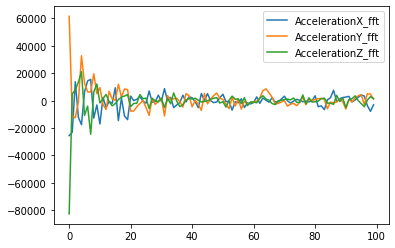

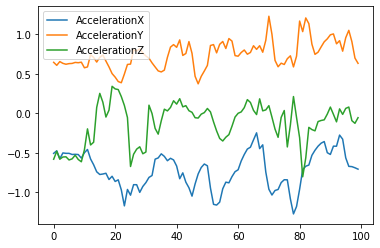

In [12]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(25, 2))
# plot the first 100 column 'AccelerationX' and 'AccelerationX_fft'
df[['AccelerationX_fft', 'AccelerationY_fft', 'AccelerationZ_fft']].head(100).plot()
df[['AccelerationX', 'AccelerationY', 'AccelerationZ']].head(100).plot()

In [57]:
df2 = df.sample(frac = 0.5).reset_index(drop=True)[['DeviceOrientation','AccelerationX', 'AccelerationY', 'AccelerationZ', 'Label']]

In [59]:
df2

,DeviceOrientation,AccelerationX,AccelerationY,AccelerationZ,Label
0,portrait,0.243820,0.078293,-0.940155,walkSit
1,portraitUpsideDown,-0.600067,0.980850,-0.139481,walkFall
2,portrait,0.100464,0.304398,-1.124756,walkSit
3,portraitUpsideDown,-0.630905,0.717270,0.090546,downSit
4,landscapeRight,1.306610,0.139282,-0.183823,walkSit
...,...,...,...,...,...
101295,portraitUpsideDown,-0.578125,0.589325,0.012421,downSit
101296,portrait,0.190994,0.198807,-0.935837,walkFall
101297,portrait,-1.943375,-0.112778,-0.362350,runFall
101298,landscapeRight,-0.820023,0.224121,0.093842,runSit


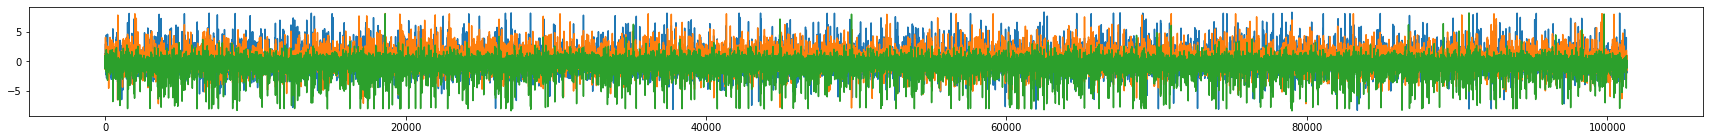

In [60]:
plt.figure(figsize=(30, 2))
plt.plot(range(0, 101300), df2[['AccelerationX', 'AccelerationY', 'AccelerationZ']])

## Predictions every 200 data

In [63]:
# Define the target variable column name
target_column = 'Label'

# Split the data into chunks of 100 rows
chunks = [df2[i:i+200] for i in range(0, len(df2), 200)]

# Initialize variables to store the maximum count and corresponding category
max_count = 0
max_category = None

# Iterate over each chunk
for chunk in chunks:
    # Count the occurrences of each category in the target variable
    count = chunk[target_column].value_counts()
    
    # Get the category with the maximum count in the current chunk
    current_category = count.idxmax()
    print(current_category)

walkSit
walkFall
runFall
walkFall
walkSit
walkFall
walkFall
walkSit
walkFall
walkFall
walkSit
walkSit
walkFall
walkFall
walkFall
walkFall
walkSit
walkSit
walkFall
runFall
walkSit
walkFall
walkFall
walkFall
walkFall
walkSit
walkFall
walkSit
walkFall
walkFall
walkFall
walkFall
walkFall
runFall
walkFall
walkFall
walkFall
walkFall
runFall
walkFall
walkFall
walkSit
walkSit
walkFall
walkSit
walkFall
walkFall
walkSit
walkFall
walkFall
walkFall
walkFall
runFall
walkSit
walkFall
walkSit
walkFall
walkFall
walkSit
walkFall
walkFall
walkFall
walkFall
walkFall
walkFall
walkFall
walkSit
walkFall
walkFall
walkFall
walkFall
runFall
walkFall
walkSit
walkFall
walkFall
walkSit
walkFall
walkFall
walkFall
walkSit
walkSit
walkFall
walkFall
walkFall
walkFall
walkFall
walkSit
walkFall
walkFall
walkFall
walkFall
walkSit
walkFall
walkSit
walkSit
walkFall
walkFall
walkFall
walkSit
walkFall
walkSit
walkFall
walkSit
walkFall
walkFall
runFall
walkSit
walkFall
runFall
runFall
walkFall
walkFall
walkFall
runFall
walkF